The data set [here](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) contains information on articles posted on Mashable as well as the number of shares they received via social media. There are 61 features in the data set -- this includes the response `shares` as well as the URL to the article and the time between the article's posting and when the data was found. After cleaning then, there are 58 predictors and one response. A full list of the predictors and what they measure can be found on the website the data was taken from. There are 39644 observations in the data set. The goal of the analysis is to predict whether or not an article will be popular and which features are most relevant to an article's popularity.

The first issue is of course what it means for an article to be popular. If 

In [301]:
news.shape

(39644, 59)

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestClassifier

In [238]:
news = pd.read_csv("data/OnlineNewsPopularity/OnlineNewsPopularity.csv")

In [239]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [240]:
news = news.rename(columns=lambda x: x.strip())
news = news.iloc[:,2:]  

In [242]:
news.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [236]:
news.head()

,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [300]:
summary = pd.DataFrame(news["shares"].describe())

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


In [92]:
pop_thresh = 2800

def is_pop(x):
    if x >= pop_thresh:
        return 1
    else:
        return 0

news["is_pop"] = news["shares"].apply(lambda x: is_pop(x))

In [93]:
news.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,is_pop
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [184]:
q = news["shares"].quantile(0.95)

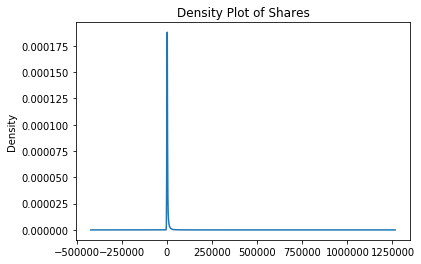

In [208]:
news["shares"].plot(kind='density')
plt.title("Density Plot of Shares")
plt.show()

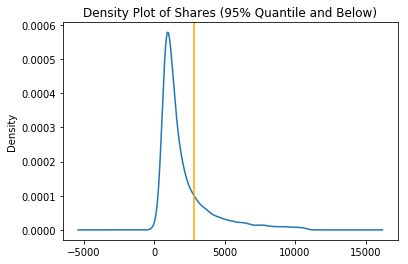

In [200]:
pd.DataFrame(news["shares"][news["shares"]<=q]).plot(kind='density', legend=None)
plt.axvline(pop_thresh, color='orange')
plt.title("Density Plot of Shares (95% Quantile and Below)")
plt.show()

In [122]:
X, Xtest, y, ytest = train_test_split(news.iloc[:, :-2], news.iloc[:,-1:], test_size=0.2)
y = y.as_matrix().reshape(len(y),)
ytest = ytest.as_matrix().reshape(len(ytest),)
X = X.as_matrix()
Xtest = Xtest.as_matrix()

In [260]:
C_range = [10**i for i in range(-5,6)]
rfe_cv = {}

for c in C_range:
    lr_rfe = RFE(LogisticRegression(penalty='l2', C=c))
    rfe_cv[c] = cross_val_score(lr_rfe, X, y, scoring='accuracy')

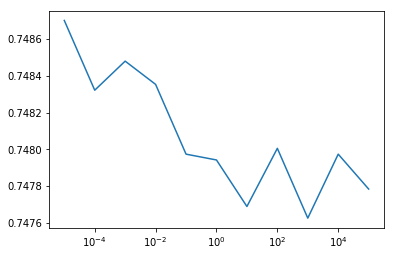

In [262]:
mean_cv = []

for i in rfe_cv:
    mean_cv.append(np.mean(rfe_cv[i]))
    
plt.plot(C_range, mean_cv)
plt.xscale('log')
plt.show()

In [264]:
lr_mod = RFE(LogisticRegression(penalty='l2', C=10**-5))
lr_mod.fit(X,y)

RFE(estimator=LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [274]:
coefs_taken = news.columns[:-1][lr_mod.support_]

In [278]:
coefs_taken[0]

'n_tokens_title'

In [285]:
mod_coefs = {}
for i in range(len(lr_mod.estimator_.coef_[0])):
    mod_coefs[coefs_taken[i]] = lr_mod.estimator_.coef_[0][i]

In [286]:
mod_coefs

{'LDA_01': -0.0021616553722306536,
 'LDA_02': -0.0061683285446268695,
 'abs_title_subjectivity': -0.0024876198263868885,
 'average_token_length': -0.035482013736370624,
 'avg_negative_polarity': 0.0013478058271171964,
 'avg_positive_polarity': -0.0021523944162525743,
 'data_channel_is_bus': -0.0024197062460390006,
 'data_channel_is_entertainment': -0.0044801122899556373,
 'data_channel_is_socmed': 0.0015680503187445335,
 'data_channel_is_world': -0.0077625599712959443,
 'global_subjectivity': -0.0021781707600497342,
 'is_weekend': 0.0031918039467324346,
 'max_positive_polarity': -0.0045608777146019189,
 'min_negative_polarity': 0.0030332056752793864,
 'n_tokens_title': -0.062543487641024506,
 'num_hrefs': 0.005419849065482138,
 'num_imgs': 0.0083543376135005315,
 'num_keywords': -0.029584230389317553,
 'num_self_hrefs': -0.011573168034040139,
 'num_videos': 0.0041641902410061429,
 'rate_negative_words': -0.00279965704058376,
 'rate_positive_words': -0.0044683280922598895,
 'weekday_is_

In [298]:
df_coefs = pd.DataFrame([mod_coefs], columns=mod_coefs.keys()).transpose()
df_coefs.columns = ['Coefficient Value']
df_coefs

,Coefficient Value
n_tokens_title,-0.062543
num_hrefs,0.005420
num_self_hrefs,-0.011573
num_imgs,0.008354
num_videos,0.004164
average_token_length,-0.035482
num_keywords,-0.029584
data_channel_is_entertainment,-0.004480
data_channel_is_bus,-0.002420
data_channel_is_socmed,0.001568


In [288]:
lr_mod.score(Xtest,ytest)

0.74561735401689999

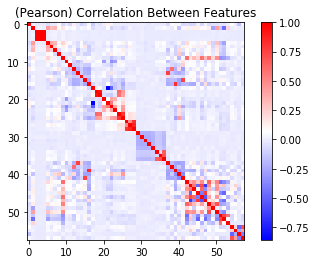

In [95]:
cor_coefs = X.corr()

plt.imshow(cor_coefs, cmap='bwr', interpolation='nearest')
plt.title("(Pearson) Correlation Between Features")
plt.colorbar()
plt.show()

L1-regulatization isn't necessarily picky about which one of them it chooses and L2-regularization won't perform the feature selection that we're interested in, so we might try an Elastic Net. Before we do fit a model though, we also have to contend with the fact that the features are on different scales from each other and the reponse is on a vastly different scale than any of the features. We can standardize the features and response.